In [1]:
import os
import subprocess
import multiprocessing
import resource
import matplotlib.pyplot as plt
import math
import scipy
from functools import lru_cache
from scipy.integrate import quad, dblquad, tplquad
from VLC_init import *
from pose_estimation import *
from rtof_pos import *

In [2]:
vlc_obj = VLC_init()

tx_coords = ((-5, 2), (-5, 3))
rx_coords = ((0, 0), (0, 1))

vlc_obj.update_coords(tx_coords, rx_coords)
vlc_obj.update_lookuptable()

aoa = Pose(vlc_obj)
rtof = RToF_pos(vlc_obj)

In [3]:
tx_aoa = aoa.estimate()
tx_rtof = rtof.estimate()

Distance:  5.085 Error:  0.014019513592784527
Distance:  5.37 Error:  0.015164807134503633
x:  -4.987729616127337
y:  1.9898375000000001
Distance:  5.37 Error:  0.015164807134503633
Distance:  5.835 Error:  0.004048105154699222
x:  -4.940161014440092
y:  3.1051624999999987


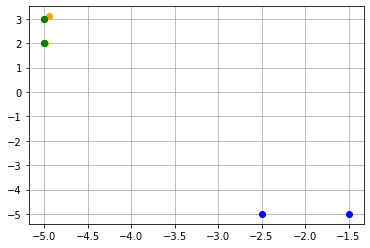

In [5]:
plt.figure()
plt.plot(vlc_obj.trxpos, vlc_obj.trypos,'o', color='green')
plt.plot(tx_rtof[0], tx_rtof[1], 'o', color='orange')
plt.plot(tx_aoa[0], tx_aoa[1], 'o', color='blue')
plt.grid()